# **Malaria Detection**

## <b>Problem Definition</b>
**The context:** Malaria is a life-threatening disease caused by Plasmodium parasites, transmitted through bites of infected female Anopheles mosquitoes. It affects nearly half of the global population, with over 229 million cases and 400,000 deaths reported in 2019 — 67% of which were children under five. The parasite can remain in the body for over a year without symptoms, making early detection critical. Traditional diagnosis relies on manual inspection of red blood cells (RBCs), which is labor-intensive, time-consuming, and subject to human error. Automating this process using Machine Learning (ML) and Deep Learning (DL) techniques has shown promise in improving diagnostic accuracy and efficiency. This project aims to develop an AI-based solution for accurate and early malaria detection.<br>


**The objectives:** The goal is to build an efficient computer vision model that can automatically detect malaria by analyzing images of red blood cells. The model should classify each cell image as either parasitized (infected with malaria) or uninfected, enabling fast and accurate diagnosis.<br>


**The key questions:** 
 - Can we accurately detect malaria-infected red blood cells using image data?
 - What deep learning architecture yields the best performance for malaria classification?
 - How can we optimize the model for both accuracy and computational efficiency?
 - What is the minimum amount of data or preprocessing required to achieve high accuracy?
 - How generalizable is the model across different datasets or imaging conditions?<br>


**The problem formulation:** This project aims to solve a binary image classification problem using data science and deep learning techniques. Specifically, the task is to develop a computer vision model that can:
 - Take as input an image of a red blood cell from a blood smear,
 - Automatically analyze the visual features,
 - And classify the image as either parasitized (malaria-infected) or uninfected.

The broader objective is to support rapid, accurate, and scalable malaria diagnosis in clinical and resource-constrained settings, thereby reducing dependence on manual microscopy and enabling timely treatment.

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


### <b>Loading libraries</b>

In [1]:
# Importing libraries required to load the data
import zipfile
import os, cv2, sys
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

### <b>Let us load the data</b>

**Note:** 
- The dataset was downloaded from the link provided on the learning platform and uploaded on the local drive before executing the code in the next cell.

In [2]:
# Storing the path of the data file from the Google drive
path = 'cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name. 

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model. 

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [3]:
# Storing the path of the extracted "train" folder 
train_dir = 'cell_images/train'
# Size of image so that each image has the same size
SIZE = 64
# Empty list to store the training images after they are converted to NumPy arrays
train_images = []
# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [4]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)
    for i, image_name in enumerate(images_path):
        try:
            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))
            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                train_labels.append(1)  # Label for parasitized images
            else:          
                train_labels.append(0)       
        except Exception:
            pass       
# Converting lists to arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [5]:
# Storing the path of the extracted "test" folder 
test_dir = 'cell_images/test'
# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64
# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []
# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [6]:
# We will run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:
    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)
    for i, image_name in enumerate(images_path):
        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)           
            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))           
            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))           
            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':
                test_labels.append(1)
            else:
                test_labels.append(0)
        except Exception:
            pass       
# Converting lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

### <b> Checking the shape of train and test images along with the labels

In [7]:
print("Shape of training images:", train_images.shape)
print("Shape of testing images:", test_images.shape)
print(60 * "-")
print("Shape of training labels:", train_labels.shape)
print("Shape of testing labels:", test_labels.shape)

Shape of training images: (24958, 64, 64, 3)
Shape of testing images: (2600, 64, 64, 3)
------------------------------------------------------------
Shape of training labels: (24958,)
Shape of testing labels: (2600,)


#### <b> 📊 Observations:

🔹 Training Data
 - train_images.shape = (24,958, 64, 64, 3)
 - We have 24,958 RGB images, each of size 64x64 pixels. 3 in the end indicates the number of channels (RGB).

train_labels.shape = (24,958,)
 -  There are 24,958 corresponding labels, meaning every image has one label.

🔹 Testing Data
 - test_images.shape = (2,600, 64, 64, 3)
 - The test set contains 2,600 RGB images, also of size 64x64.

 - test_labels.shape = (2,600,)
 -  You have 2,600 labels—again, a 1-to-1 match with the test images.

<b> 📈 Insights:

✅ Data is well-aligned

The number of images matches the number of labels in both training and testing sets, so our dataset is properly structured for supervised learning.

📦 We're using RGB images

The 3 in the shape (last dimension) confirms all our images are in color (RGB), not grayscale.

🧪 We’re using a ~90/10 split

Total images = 24,958 (train) + 2,600 (test) = 27,558

Train set = ~90.6%

Test set = ~9.4%

✅ This is a reasonable and commonly used split for image classification tasks.

📐 Uniform Image Dimensions

All images are consistently sized to 64x64, which ensures efficient training and compatibility with CNN models.


### <b>Check the minimum and maximum range of pixel values for train and test images

In [8]:
print("Train images pixel range:", train_images.min(), "to", train_images.max())
print("Test images pixel range:", test_images.min(), "to", test_images.max())

Train images pixel range: 0 to 255
Test images pixel range: 0 to 255


#### <b> Observations:
 - The pixel values for both train and test images range from 0 to 255.
 - This indicates that the images are in standard 8-bit RGB format, where each channel (Red, Green, Blue) can take values from 0 (darkest) to 255 (brightest).
 - The pixel range is consistent across both datasets, which is important for model training and evaluation.

 <b> Insights:
  - Since the pixel values are not normalized, it is recommended to scale them to the [0,1] range before feeding them into a neural network. This helps the model train more efficiently and can improve convergence.
  - The consistency in pixel range between train and test sets ensures that the model will not encounter unexpected data distributions during interference.
  - No outliers or corrupted images are present in termins of pixel intensity, which means the data quality is good for image classification tasks.



### <b> Count the number of values in both uninfected and parasitized 

In [9]:
print("Training label counts:")
print(pd.Series(train_labels).value_counts())
print(30*"*")
print("Test label counts:")
print(pd.Series(test_labels).value_counts())

Training label counts:
1    12582
0    12376
Name: count, dtype: int64
******************************
Test label counts:
1    1300
0    1300
Name: count, dtype: int64


### <b>Normalize the images

In [10]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

print("Train images pixel range:", train_images.min(), "to", train_images.max())
print("Test images pixel range:", test_images.min(), "to", test_images.max())

Train images pixel range: 0.0 to 1.0
Test images pixel range: 0.0 to 1.0


#### <b> Observations and insights:

✅ The image pixel values have been successfully normalized from the original range of [0, 255] to [0.0, 1.0].
 - This ensures the model can train more efficiently and avoid gradient instability.
 - Most deep learning models (especially CNNs) expect inputs to be normalized.

 - The training set is very well balanced: the difference between the two classes is minimal (≈ 1.6%).
 -  A balanced dataset reduces the risk of model bias toward one class.
 - No class weighting or oversampling at this stage needs to be applied.

 - Perfectly balanced test set (50-50 split) ✅
 - This will allow to accurately evaluate model performance for both classes.
 - A reliable assessment of precision, recall, F1-score, confusion matrix, and ROC AUC could be made.

### <b>Plot to check if the data is balanced

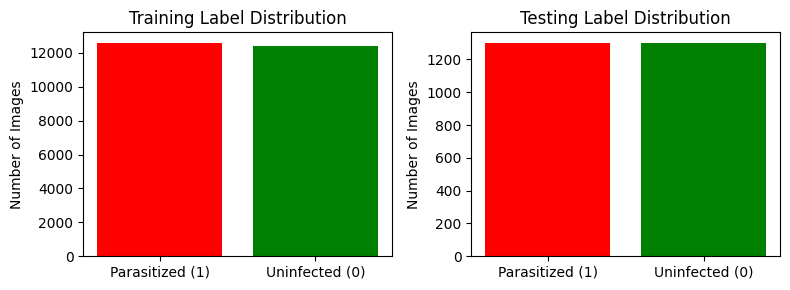

In [11]:
# Label counts
train_counts = [12582, 12376]
test_counts = [1300, 1300]
labels = ['Parasitized (1)', 'Uninfected (0)']

# Plot bar chart for training labels
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.bar(labels, train_counts, color=['red', 'green'])
plt.title('Training Label Distribution')
plt.ylabel('Number of Images')

# Plot bar chart for testing labels
plt.subplot(1, 2, 2)
plt.bar(labels, test_counts, color=['red', 'green'])
plt.title('Testing Label Distribution')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()

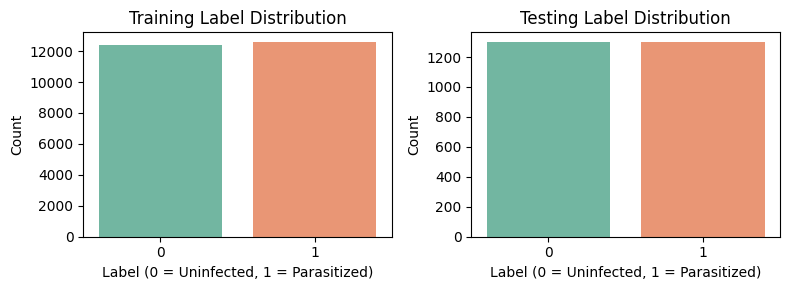

In [12]:
# Convert labels to Pandas Series (if not already)
train_labels_series = pd.Series(train_labels)
test_labels_series = pd.Series(test_labels)

# Plot countplot for training data
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
sns.countplot(x=train_labels_series, palette='Set2')
plt.title('Training Label Distribution')
plt.xlabel('Label (0 = Uninfected, 1 = Parasitized)')
plt.ylabel('Count')

# Plot countplot for testing data
plt.subplot(1, 2, 2)
sns.countplot(x=test_labels_series, palette='Set2')
plt.title('Testing Label Distribution')
plt.xlabel('Label (0 = Uninfected, 1 = Parasitized)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

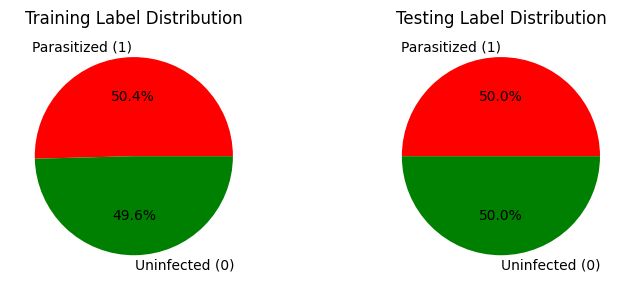

In [13]:
# For training labels
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.pie(train_counts, labels=labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Training Label Distribution')

# For testing labels
plt.subplot(1, 2, 2)
plt.pie(test_counts, labels=labels, autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Testing Label Distribution')

plt.tight_layout()
plt.show()

#### <b> Observations and insights:
🔍 Key Insights from Your Label Distribution:

📊 Training Set
 - Parasitized: 12,582 images (~50.4%)
 - Uninfected: 12,376 images (~49.6%)
 - *Insight*: The dataset is nearly balanced — just a slight skew (206 images difference) which is negligible for most models. No special handling like oversampling or undersampling is required at this point.

🧪 Test Set
 - Parasitized: 1300 images (50%)
 - Uninfected: 1300 images (50%)
 - *Insight*: Perfectly balanced test data ensures fair evaluation of model performance across both classes. The metrics like accuracy, precision, recall, and F1 score without bias toward one class could be reliable.

### <b>Data Exploration</b>
Let's visualize the images from the train data

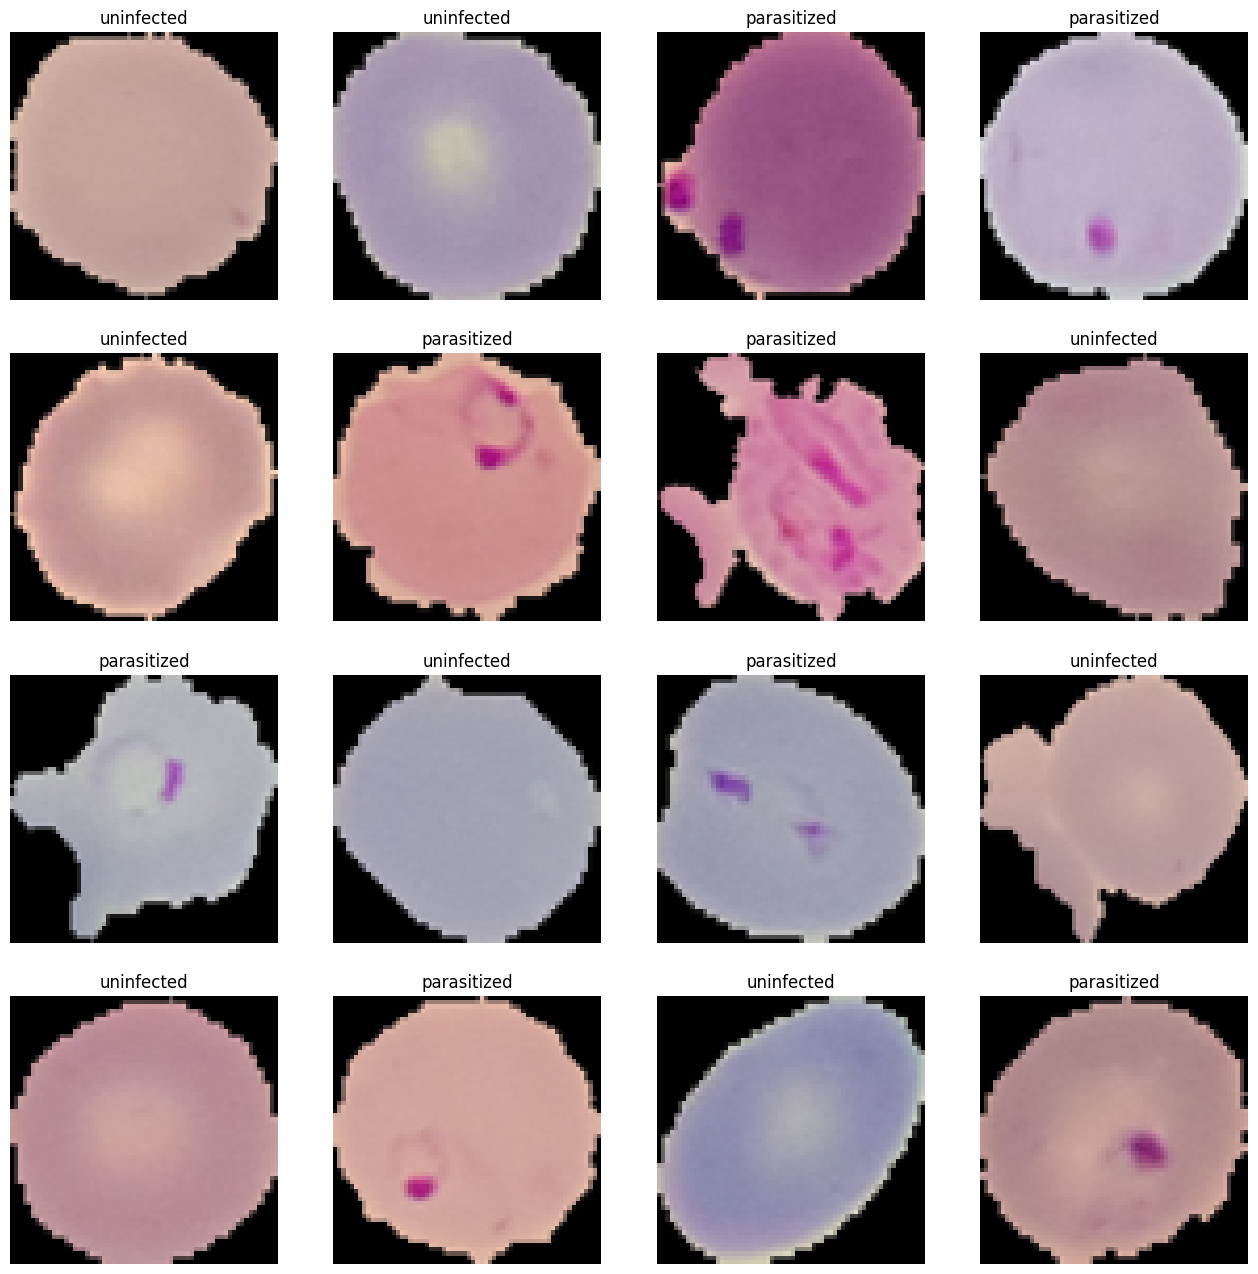

In [14]:
np.random.seed(42)
plt.figure(1, figsize = (16 , 16))
for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized')
    else:
        plt.title('uninfected')
    plt.imshow(train_images[index])
    plt.axis('off')

#### <b> Observations and insights:
🔬 Visual Inspection Insights from Training Images observations:
 - Parasitized images consistently show a small dot-like structure inside or attached to the red blood cell.
 - Uninfected images do not show this feature — the cells appear clean, smooth, and uniform in color.

💡 Insights & Interpretation:
 - Distinct Visual Pattern for Classification:
The presence of a distinct visual cue (the dot) provides a clear discriminative feature that a computer vision model (e.g., CNN) can learn to differentiate parasitized vs. uninfected cells.

 - Relevance of Local Patterns:
Since this "dot" is usually localized within or near the cell boundary, convolutional layers in a CNN are well-suited to capture and learn these localized spatial features.

 - Feature Importance for Model:
These dot-like structures may emerge as high-activation regions in feature maps, which you might later visualize using Grad-CAM or similar techniques to validate model behavior.

 - Assumption for Label Quality:
The fact that these dot patterns visually align with parasitized labels supports the assumption that the labels are accurate and clean, reducing concerns about mislabeled data.

Potential Challenges:
 - Some parasitized cells may have very faint or partial dots, possibly making them harder to detect.
 - Blurry or poorly lit images might reduce model accuracy if the dot feature is obscured.


### <b> Similarly visualize the images with subplot(6, 6) and figsize = (12, 12)

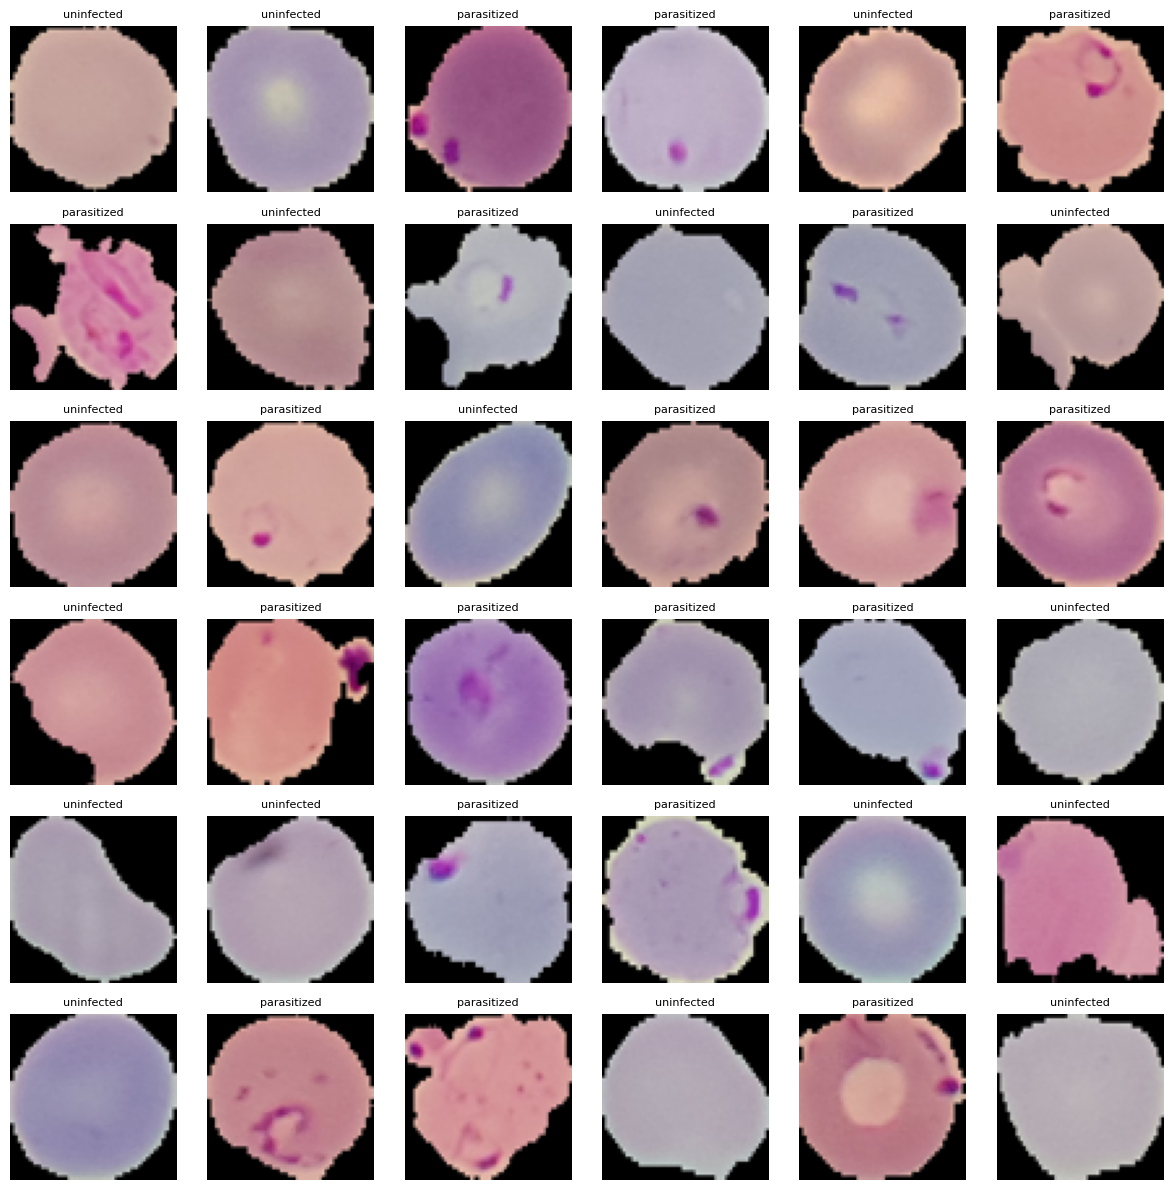

In [15]:
np.random.seed(42)
plt.figure(1, figsize=(12, 12))
# 6 rows x 6 columns = 36 images
for n in range(1, 37):
    plt.subplot(6, 6, n)
    index = int(np.random.randint(0, train_images.shape[0], 1))
    if train_labels[index] == 1: 
        plt.title('parasitized', fontsize=8)
    else:
        plt.title('uninfected', fontsize=8)
    plt.imshow(train_images[index])
    plt.axis('off')
plt.tight_layout()
plt.show()

#### <b>Observations and insights:
🔍 Observations
 - Visual Marker Presence: Parasitized images clearly exhibit a dot-sized mark, likely representing the malaria parasite inside the red blood cell. Uninfected images lack this dot, showing cleaner and uniformly textured red blood cells.
 - Clarity and Consistency: The difference between the two classes appears visually distinct, even at smaller dimensions (64×64), which is promising for classification using image-based deep learning.
 - No Major Noise or Blur: Most images seem reasonably sharp and well-centered, reducing the risk of noise affecting training quality.
 - Color Distribution: Images maintain natural color tones and lighting, suggesting they haven’t been overly compressed or augmented in a damaging way.

💡 Insights for Model Development
 - Strong Feature Signal: Since the dot in parasitized cells is visually detectable, CNNs are likely to learn this distinguishing feature well, improving classification performance.
 - Justifies Use of CNN: The clear local feature (dot) supports using convolutional filters that specialize in learning spatial patterns.
 - Low Risk of Label Noise: The visual differences align well with labels, suggesting labels are trustworthy and were likely curated with domain expertise.
 - Model Interpretability: Because a human can spot the pattern, it implies that model interpretability techniques (like Grad-CAM or saliency maps) will likely highlight the same dot-sized region during predictions—enhancing trust and explainability.

### <b> Plotting the mean images for parasitized and uninfected

In [16]:
# Function to find the mean
def find_mean_img(full_mat, title):
    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]
    # Reshape it back to a matrix
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

<b> Mean image for parasitized

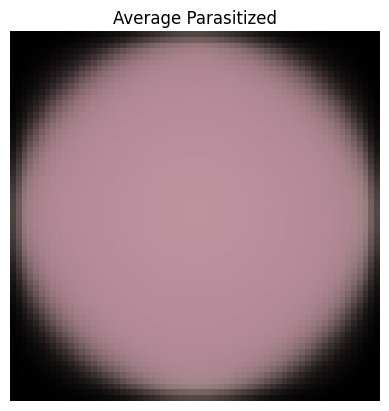

In [17]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data
for img, label in zip(train_images, train_labels):
        if label == 1:      
              parasitized_data.append([img])          
parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

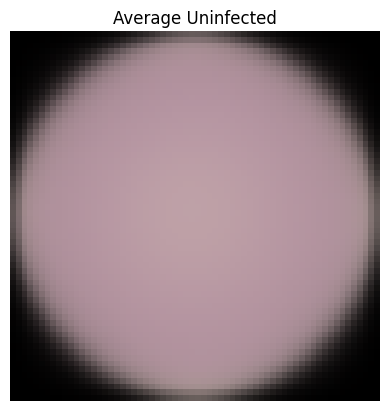

In [18]:
uninfected_data = []  # Create a list to store the uninfected data
for img, label in zip(train_images, train_labels):
        if label == 0:    
              uninfected_data.append([img])          
uninfected_data_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean

#### <b> Observations and insights:
🔍 Observations
 - High Visual Similarity in Averages: The mean images for parasitized and uninfected classes appear almost indistinguishable—suggesting no strong global differences when averaged pixel by pixel. Any distinguishing features, such as the dot-like parasite, get blurred out in the averaging process.
 - Blurry and Washed-Out Features: Mean images are inherently blurry since they represent a composite of many cells with slight variations in size, position, lighting, and orientation.
 - Low Signal in Global Patterns: Features that differ between classes are likely localized and subtle, not global or structural.

 💡 Insights
 - Important Features Are Local, Not Global: The classifier needs to focus on small, spatially localized patterns (like the parasite dot) rather than global cell shape, color, or structure. This validates the choice of convolutional layers in CNNs which excel at detecting local features.
 - Justifies Data Augmentation: Since the mean image doesn't reveal class differences, the model must be robust to positional variations. This reinforces the importance of data augmentation (like random shifts, zoom, flips) to teach the model not to overfit to irrelevant features.
 - Need for Fine-Grained Feature Extraction: The task is more of a fine-grained classification problem, not a coarse one. Deeper CNN architectures or attention mechanisms may help by focusing on critical regions (e.g., parasite location).
 - No Strong Class Bias: Similar mean images also indicate that your dataset isn’t biased in lighting, background, or color across classes—which is a good thing. The classes are visually balanced, reducing the risk of a model learning shortcuts (like background hue) instead of medically relevant features.

### <b>Converting RGB to HSV of Images using OpenCV

Converting to HSV may improve contrast between infected and uninfected cells by isolating color-based differences (e.g., parasite staining). While CNNs can learn such features directly from RGB, HSV transformation can be a useful preprocessing step, especially if used selectively (e.g., Hue channel only) or for classical image processing approaches.


### <b> Converting the train data

In [19]:
gfx=[]   # to hold the HSV image array
for i in np.arange(0, 100, 1):
  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx = np.array(gfx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..282.0833].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..281.83096].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..280.14706].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..300.00183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..272.10526].


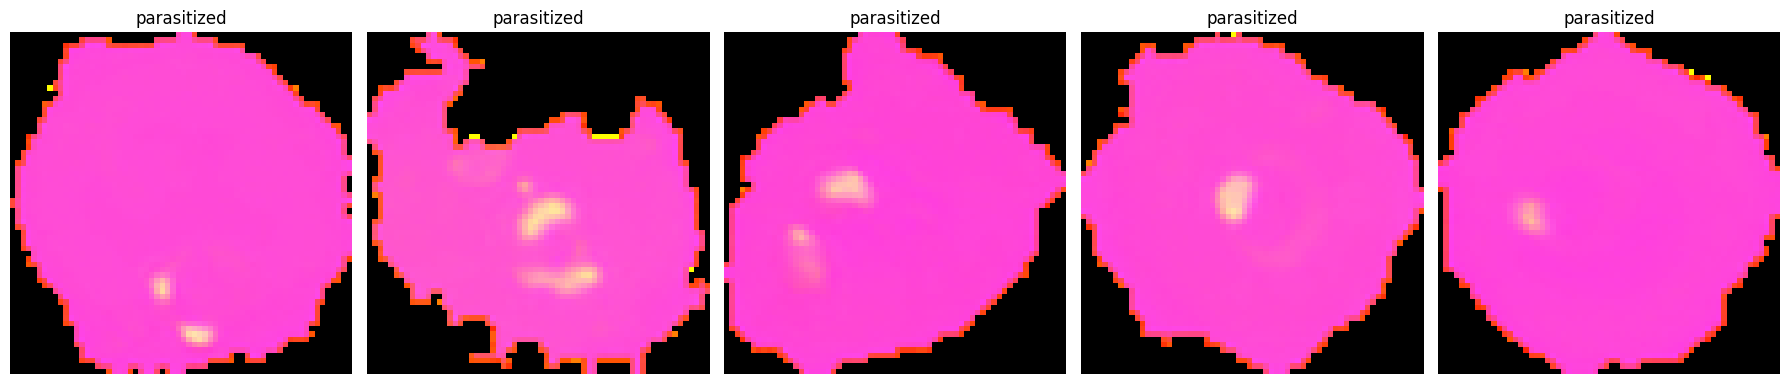

In [20]:
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))
for t, i in zip(range(5), viewimage):
  Title = train_labels[i]
  ax[t].set_title('parasitized' if Title == 1 else 'uninfected')
  ax[t].imshow(gfx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..300.00183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..250.90906].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..300.00183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..249.23076].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.9999].


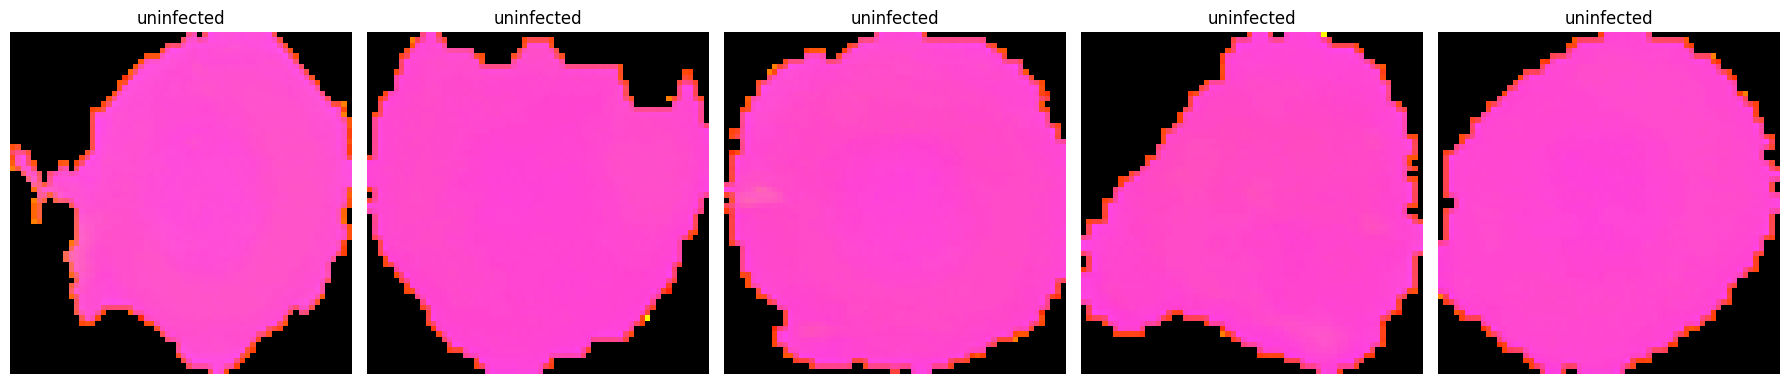

In [21]:
gfx=[]   # to hold the HSV image array
for i in np.arange(train_images.shape[0] -100, train_images.shape[0]):
  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)
  gfx.append(a)
gfx = np.array(gfx)

viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
    global_index = train_images.shape[0] - 100 + i  # Map to correct index in original dataset
    Title = train_labels[global_index]  # Get corresponding label
    ax[t].set_title('parasitized' if Title == 1 else 'uninfected')
    ax[t].imshow(gfx[i])
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

### <b> Converting the test data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..295.58823].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..293.0769].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..300.00183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..291.70212].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..290.32257].


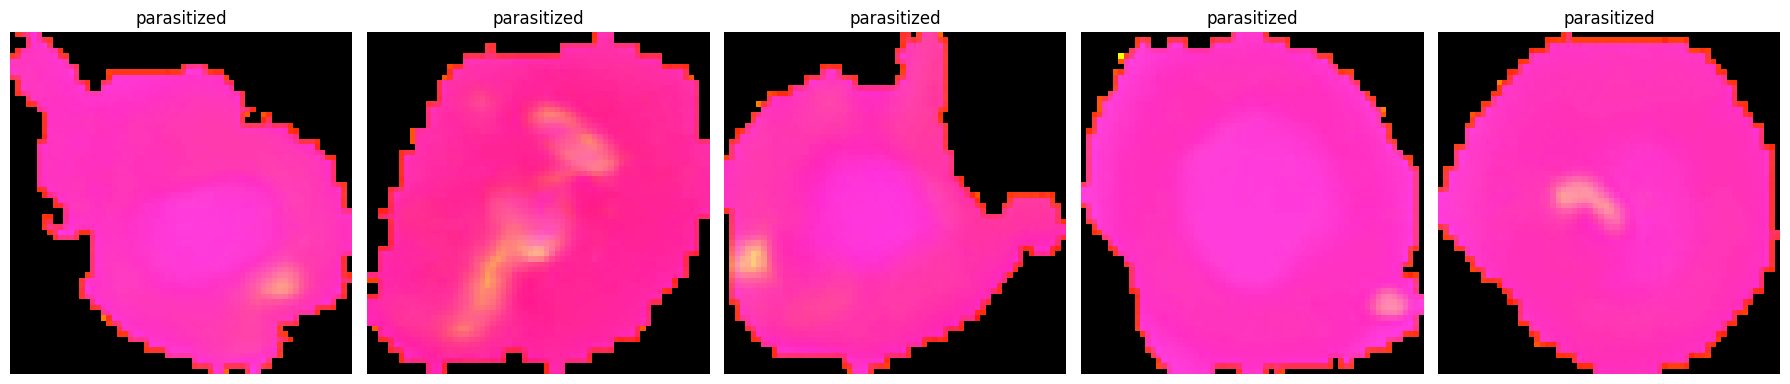

In [22]:
gfy=[]   # to hold the HSV image array

for i in np.arange(0, 100, 1):
  b = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
  gfy.append(b)

gfy = np.array(gfy)
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))
for t, i in zip(range(5), viewimage):
  Title = test_labels[i]
  ax[t].set_title('parasitized' if Title == 1 else 'uninfected')
  ax[t].imshow(gfy[i])
  ax[t].set_axis_off()
  fig.tight_layout()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..300.00183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..300.00183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..300.00183].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..240.0].


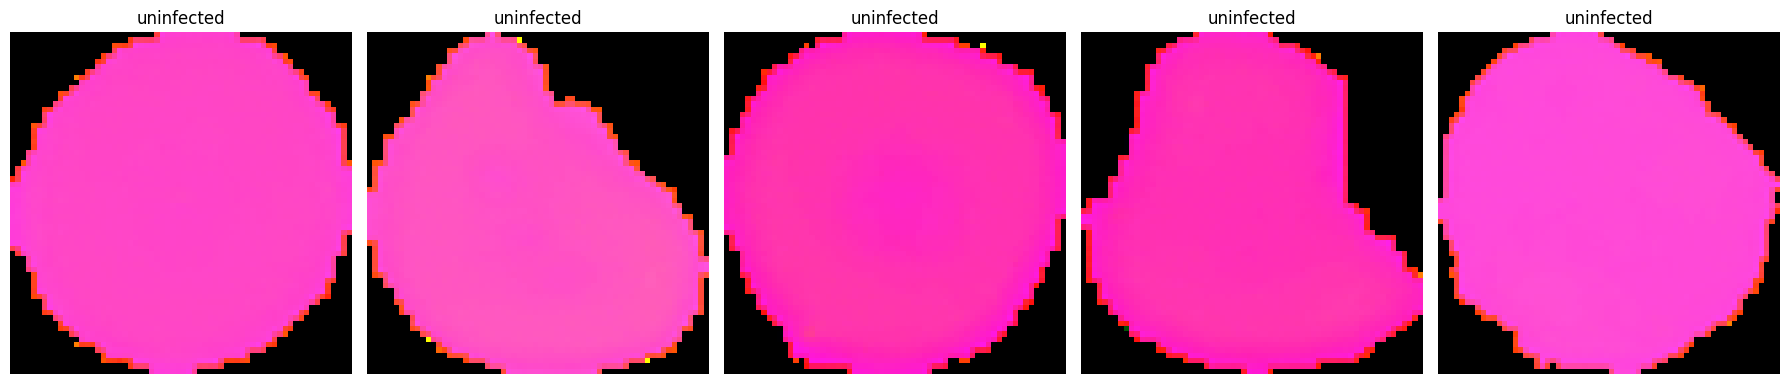

In [23]:
gfy=[]   # to hold the HSV image array

for i in np.arange(test_images.shape[0] - 100, test_images.shape[0]):
    b = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)
    gfy.append(b)

gfy = np.array(gfy)
viewimage = np.random.randint(0, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))
for t, i in zip(range(5), viewimage):
    global_index = test_images.shape[0] - 100 + i  # Map to correct index in original dataset
    Title = test_labels[global_index]  # Get corresponding label
    ax[t].set_title('parasitized' if Title == 1 else 'uninfected')
    ax[t].imshow(gfy[i])
    ax[t].set_axis_off()
fig.tight_layout()

#### <b> Observations and insights: 
🧠 Observations from HSV Image Analysis:
 - Distinct Yellow Dot in Parasitized Cells: Upon converting the RGB images to HSV and visually inspecting the samples, parasitized cell images consistently exhibit a distinct yellow dot-like mark within the cell structure. This yellow region is visually prominent in the Hue and Saturation components, suggesting a unique color signature associated with the presence of the malaria parasite.
 - Absence of Yellow Dot in Uninfected Cells: In contrast, the uninfected cell images lack any such yellow or highly saturated regions, displaying more uniform textures and coloration throughout the cell. This indicates that uninfected cells do not possess the visual markers that are otherwise apparent in parasitized cells under HSV transformation.

Insights and Implications:
 - HSV Color Space May Enhance Discriminative Features: The conversion from RGB to HSV has helped amplify subtle color features (like hue variations and saturation) that are not as distinguishable in the RGB space.
 - Potential for Feature Engineering or Preprocessing: The yellow dot signature in parasitized cells could be extracted or emphasized through targeted preprocessing (e.g., focusing on hue range or saturation thresholds).
 - Supports the Use of Computer Vision for Diagnosis: These visual distinctions reinforce the viability of using automated vision-based systems to classify malaria-infected cells, particularly with preprocessing pipelines that exploit HSV or other perceptual color spaces.

### <b> Processing Images using Gaussian Blurring

### <b> Gaussian Blurring on train data

In [24]:
gbx = []  # To hold the blurred images
for i in np.arange(0, 100, 1):
  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx = np.array(gbx)

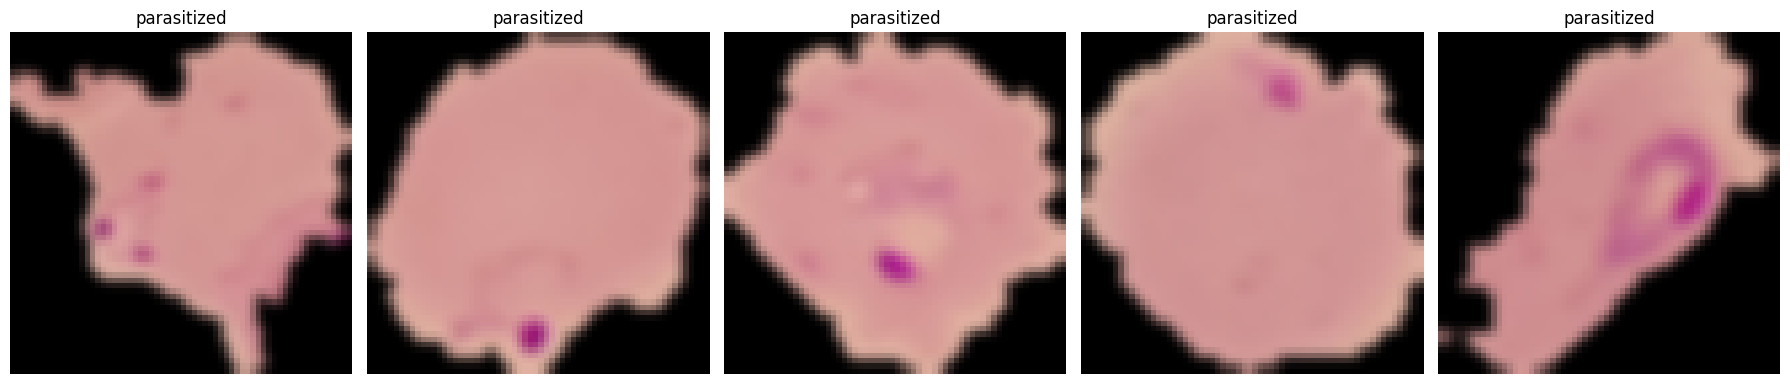

In [25]:
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))
for t, i in zip(range(5), viewimage):
  Title = train_labels[i]
  ax[t].set_title('parasitized' if Title == 1 else 'uninfected')
  ax[t].imshow(gbx[i])
  ax[t].set_axis_off()
  fig.tight_layout()

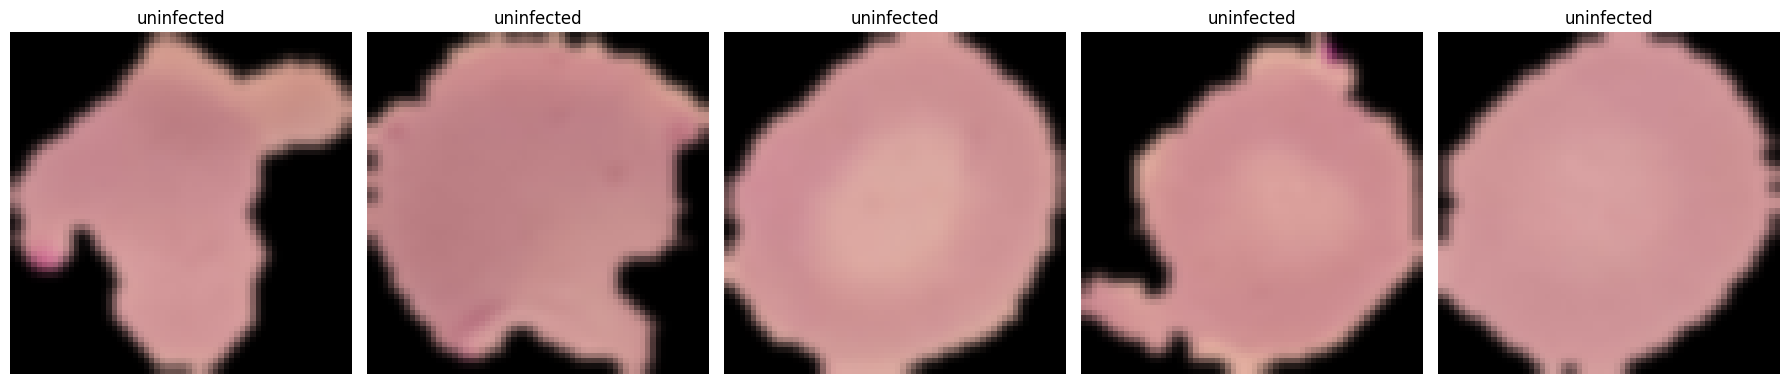

In [26]:
gbx=[]   # to hold the HSV image array
for i in np.arange(train_images.shape[0] -100, train_images.shape[0]):
  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)
  gbx.append(b)
gbx = np.array(gbx)

viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
    global_index = train_images.shape[0] - 100 + i  # Map to correct index in original dataset
    Title = train_labels[global_index]  # Get corresponding label
    ax[t].set_title('parasitized' if Title == 1 else 'uninfected')
    ax[t].imshow(gbx[i])
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

### <b> Gaussian Blurring on test data

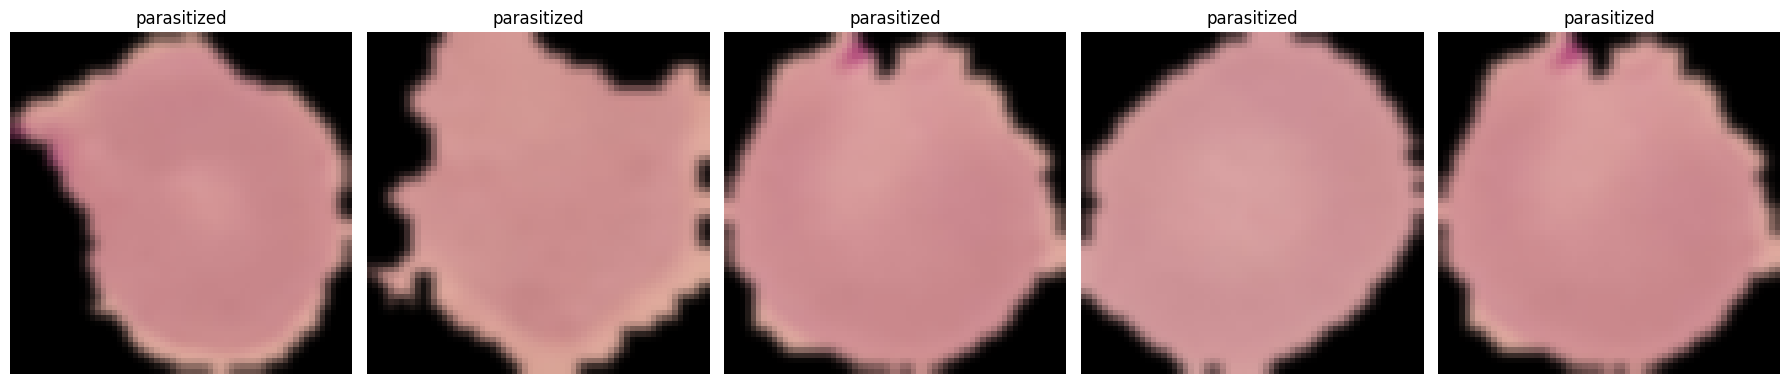

In [27]:
gby = []  # To hold the blurred images
for i in np.arange(0, 100, 1):
  c = cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gby.append(c)
gby = np.array(gby)
viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))
for t, i in zip(range(5), viewimage):
    Title = test_labels[i]
    ax[t].set_title('parasitized' if Title == 1 else 'uninfected')
    ax[t].imshow(gbx[i])
    ax[t].set_axis_off()
    fig.tight_layout()

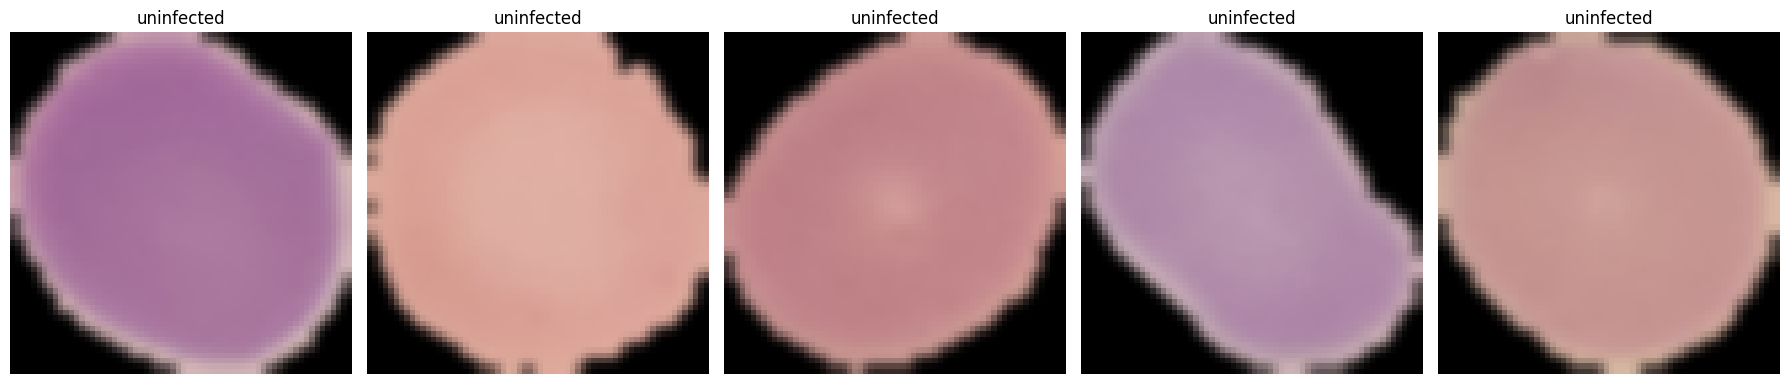

In [28]:
gby=[]   # to hold the HSV image array
for i in np.arange(test_images.shape[0] -100, test_images.shape[0]):
  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)
  gby.append(b)
gby = np.array(gby)

viewimage = np.random.randint(1, 100, 5)
fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):
    global_index = test_images.shape[0] - 100 + i  # Map to correct index in original dataset
    Title = test_labels[global_index]  # Get corresponding label
    ax[t].set_title('parasitized' if Title == 1 else 'uninfected')
    ax[t].imshow(gby[i])
    ax[t].set_axis_off()

fig.tight_layout()
plt.show()

#### **Observations and insights:**

🔍 Observation:
 - After applying Gaussian blurring to both parasitized and uninfected cell images, the overall pattern and structure remained consistent between the two classes.
 - However, the dot-like parasitic feature in infected cells became less distinct, and no significant enhancement in visual clarity was observed for either class.

📌 Insights:
 - Blurring reduces fine-grained visual cues: Gaussian blurring smooths pixel intensity differences, which appears to diminish the visibility of the key parasitic marker (a small yellow or dark dot in the HSV space).
 - No added benefit for class differentiation: Since both parasitized and uninfected cells retained a similar blurred structure, the process did not amplify class-specific differences. This implies Gaussian blurring is not a useful preprocessing step in this context.
 - Key features are high-frequency: The parasitic marker seems to be a high-frequency feature, and blurring (a low-pass filter) suppresses such features. Therefore, retaining sharpness and detail is crucial for both human visual inspection and for training models.

 🧠 Conclusion: In the context of malaria cell image classification, Gaussian blurring does not enhance visual clarity or aid in differentiating between parasitized and uninfected cells. Since the defining feature is small and detailed, retaining image sharpness is essential for effective detection—especially in automated learning models.

### <B>One Hot Encoding on the train and test labels

In [29]:
from tensorflow.keras.utils import to_categorical
# Encoding Train Labels
train_labels_encoded = to_categorical(train_labels, num_classes = 2)

# Similarly let us try to encode test labels
test_labels_encoded = to_categorical(test_labels, num_classes = 2)

# Check shape and a sample
print("Encoded Train Labels Shape:", train_labels_encoded.shape)
print("Sample encoded label (train)", train_labels_encoded[0])
print(60*"*")
print("Encoded Test Labels Shape:", test_labels_encoded.shape)
print("Sample encoded label (test)", test_labels_encoded[0])

Encoded Train Labels Shape: (24958, 2)
Sample encoded label (train) [0. 1.]
************************************************************
Encoded Test Labels Shape: (2600, 2)
Sample encoded label (test) [0. 1.]


### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

### <b> Importing the required libraries for building and training our Model

In [30]:
# Clearing backend
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras import optimizers
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle

backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### <b> Building the model

In [31]:
# Creating sequential model
model = Sequential()
# We are using a Sequential model which allows us to stack layers in order - one after the other

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
# Adding the first convolutional layer (conv2D), with 32 filters of size 2x2, to the input image (64 x 64 RGB images).
# The padding is set to "same" so that the output size is the same as the input size.
# The activation function is set to "relu", which introduces non-linearity to the model, allowing it to learn complex patterns.
model.add(MaxPooling2D(pool_size = 2))
# Adding a max pooling layer to reduce spatial dimensions - 2x2 (width and height) of the input volume.
# Helps in reducing the number of parameters and computation in the network, and also helps to control overfitting.
model.add(Dropout(0.2))
# Randomly drops "20%" of neurons during training to prevent overfitting.

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
# This block is similar in structure to the first, the input shape is only needed in the first shape.
# This block uses 32 filters, kernel size of 2, and same padding.
# This repetition allows the model to learn increasingly complex features at multiple levels.

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = 2))
model.add(Dropout(0.2))
# This block is similar in structure to the first, the input shape is only needed in the first shape.
# This block uses 32 filters, kernel size of 2, and same padding.
# This repetition allows the model to learn increasingly complex features at multiple levels.

model.add(Flatten())
# Converts the 2D matrix into a 1D vector, which is necessary before feeding it into the fully connected (Dense) layers.
model.add(Dense(512, activation = "relu"))
# Adding a dense (fully connected) layer with 512 neurons and ReLU activation function.
# This layer learns higher-level combinations of features extracted by the convolutional layers.
model.add(Dropout(0.4))
# Adding a dropout layer with a dropout rate of 0.4 to prevent overfitting as dense layers tend to overfit more.
# This means that during training, 40% of the neurons in this layer will be randomly set to zero.
model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons
# This is the final classification layer with 2 neurons (for two classes).
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,058,786 (4.04 MB)

 Trainable params: 1,058,786 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

### <b> Compiling the model

In [32]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
# Compiles Keras model, specifying the loss function (binary crossentropy for binary classification),
# optimizer (Adam), and evaluation metric (accuracy).

<b> Using Callbacks 

In [33]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.keras', monitor = 'val_loss', save_best_only = True)]
# Setting up two training callbacks: 
# 1) early stopping (stop training early if validaiton loss stops improving): 
# if validation loss doe not improve for 3 consecutive epochs, training will stop automatically to prevent overfitting
# 2) model checkpoint (save the best model based on validation loss): # after training, this file restore the best model.

<b> Fit and train our Model

In [34]:
history = model.fit(
    train_images, train_labels_encoded, batch_size = 32, callbacks = callbacks,
    validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 67s 97ms/step - accuracy: 0.7286 - loss: 0.5269 - val_accuracy: 0.9323 - val_loss: 0.2854
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.9486 - loss: 0.1294 - val_accuracy: 0.9712 - val_loss: 0.1279
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.9674 - loss: 0.0964 - val_accuracy: 0.9816 - val_loss: 0.0979
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 83s 100ms/step - accuracy: 0.9774 - loss: 0.0718 - val_accuracy: 0.9812 - val_loss: 0.0875
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 74s 87ms/step - accuracy: 0.9785 - loss: 0.0665 - val_accuracy: 0.9800 - val_loss: 0.0862
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.9785 - loss: 0.0651 - val_accuracy: 0.9772 - val_loss: 0.1003
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.9793 - loss: 0.0604 - val_accuracy: 0.9704 - val_loss: 0.1314


### <b> Evaluating the model on test data

In [35]:
accuracy = model.evaluate(test_images, test_labels_encoded, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9915 - loss: 0.0323

 Test_Accuracy:- 0.9823076725006104


<b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1300
           1       0.97      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



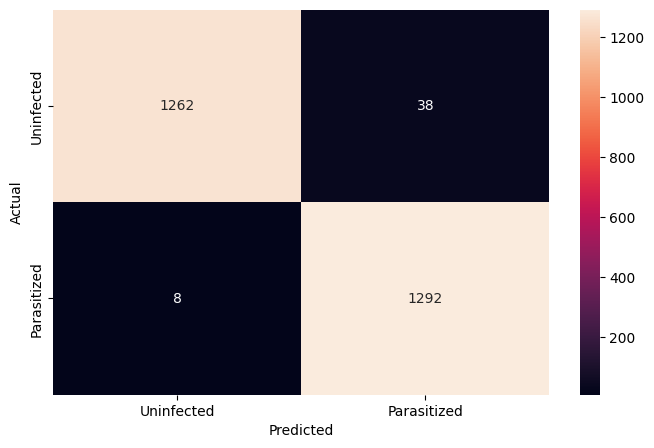

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels_encoded, axis = 1)
# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b>Plotting the train and validation curves

In [37]:
# Function to plot train and validation accuracy 
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure(figsize = (7, 7))
    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')
    plt.title("Accuracy vs Epoch")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="upper left")

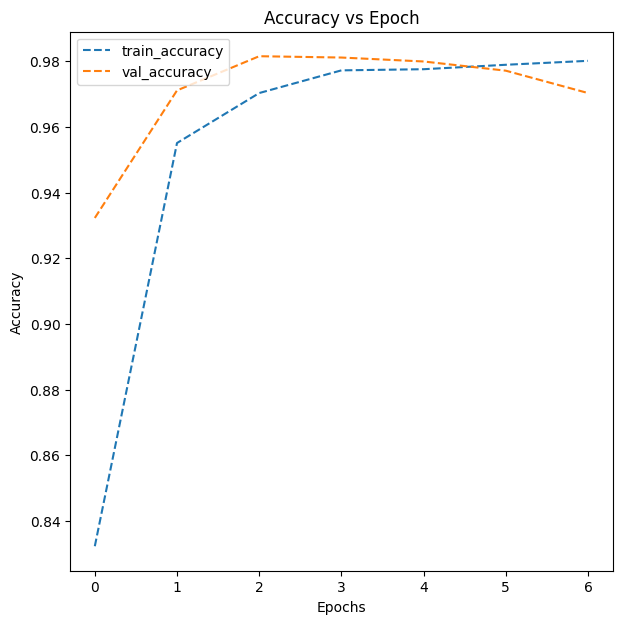

In [38]:
plot_accuracy(history)



* Here we can clearly observe that the training and valiation accuracy are increasing 
* And we can also notice that validation accuracy is slightly higher than the train accuracy

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

### <b> Model 1
#### <b> Trying to improve the performance of our model by adding new layers


In [39]:
backend.clear_session() # Clearing the backend for new model

### <b> Building the Model

The model is performing well with an accuracy of 98%, but in order to improve the accuracy, let's add complexity to the model

Let's explore with an enhanced model architecture:
 - Add more Dense laters,
 - Add Dropout for regularization,
 - Use BatchNormalization to stabilize learning,
 - Add keep ReLu and sigmoid activations.

In [40]:
# Creating sequential model
model_1 = Sequential()

# Flattening the train images
model_1.add(Flatten(input_shape = (64, 64, 3)))

# First hidden layer
model_1.add(Dense(256, activation = 'relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))

# Second hidden layer
model_1.add(Dense(128, activation = 'relu'))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))

# Third hidden layer
model_1.add(Dense(64, activation = 'relu'))
model_1.add(Dropout(0.2))

# Output layer binary classification
model_1.add(Dense(2, activation = 'sigmoid'))  # Using sigmoid activation for binary classification

# Compiling the model
model_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,188,802 (12.16 MB)

 Trainable params: 3,188,034 (12.16 MB)

 Non-trainable params: 768 (3.00 KB)

### <b> Compiling the model

In [41]:
model_1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [42]:
callbacks_1 = [EarlyStopping(monitor = 'val_loss', patience = 3),
             ModelCheckpoint('.mdl_wts.keras', monitor = 'val_loss', save_best_only = True)]

# Setting up two training callbacks: 
# 1) early stopping (stop training early if validaiton loss stops improving): 
# if validation loss doe not improve for 4 consecutive epochs, training will stop automatically to prevent overfitting
# 2) model checkpoint (save the best model based on validation loss): # after training, this file restore the best model.

<b>Fit and Train the model

In [43]:
history_1 = model_1.fit(train_images, train_labels_encoded, batch_size = 32, callbacks = callbacks_1, 
                      validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 43s 56ms/step - accuracy: 0.6671 - loss: 0.6518 - val_accuracy: 0.0188 - val_loss: 1.7677
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.7096 - loss: 0.5602 - val_accuracy: 0.0078 - val_loss: 2.1579
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.7244 - loss: 0.5425 - val_accuracy: 0.0385 - val_loss: 1.8936
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 29s 47ms/step - accuracy: 0.7352 - loss: 0.5258 - val_accuracy: 0.2997 - val_loss: 1.1430
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 47ms/step - accuracy: 0.7374 - loss: 0.5203 - val_accuracy: 0.1376 - val_loss: 1.6837
Epoch 6/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.7451 - loss: 0.5139 - val_accuracy: 0.2462 - val_loss: 1.3837
Epoch 7/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.7483 - loss: 0.5047 - val_accuracy: 0.0968 - val_loss: 1.5418


###  <b> Evaluating the model

In [44]:
accuracy_1 = model_1.evaluate(test_images, test_labels_encoded, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_1[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8319 - loss: 0.4358

 Test_Accuracy:- 0.5203846096992493


<b> Plotting the confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.84      0.05      0.09      1300
           1       0.51      0.99      0.67      1300

    accuracy                           0.52      2600
   macro avg       0.68      0.52      0.38      2600
weighted avg       0.68      0.52      0.38      2600



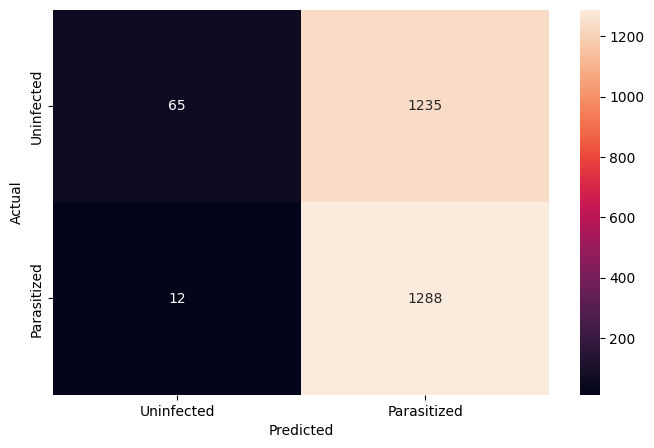

In [45]:
pred_1 = model_1.predict(test_images)
pred_1 = np.argmax(pred_1, axis = 1) 
y_true_1 = np.argmax(test_labels_encoded, axis = 1)
# Printing the classification report
print(classification_report(y_true_1, pred_1))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true_1, pred_1)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Plotting the train and the validation curves

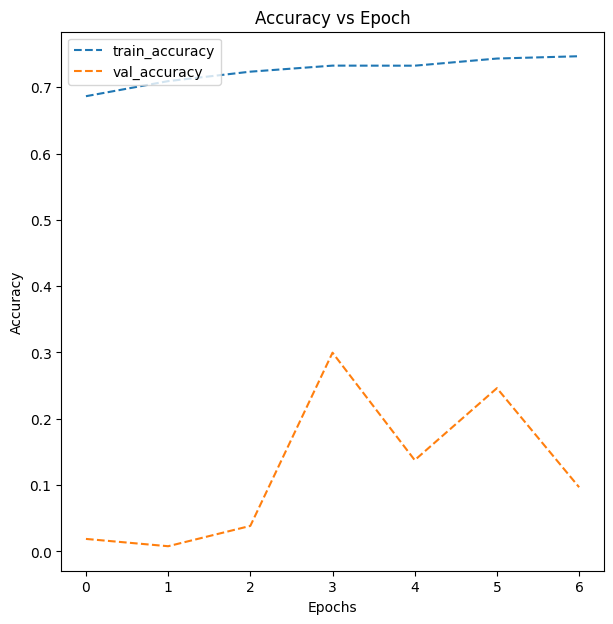

In [46]:
plot_accuracy(history_1)

### <b>Another Approach:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

### <b> Model 2 with Batch Normalization

In [47]:
backend.clear_session() # Clearing the backend for new model

###<b> Building the Model

In [48]:
model_2 = Sequential()

# Convolutional layer 1
model_2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha = 0.01))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.25))

# Convolutional layer 2
model_2.add(Conv2D(64, (3, 3), padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha = 0.01))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.25))

# Convolutional layer 3
model_2.add(Conv2D(128, (3, 3), padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha = 0.01))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.3))

# Fully connected layers
model_2.add(Flatten())
model_2.add(Dense(128))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(alpha = 0.01))
model_2.add(Dropout(0.4))

model_2.add(Dense(2, activation= 'sigmoid'))  # Using sigmoid activation for binary classification

model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,618 (4.36 MB)

 Trainable params: 1,142,914 (4.36 MB)

 Non-trainable params: 704 (2.75 KB)

###<b>Compiling the model

In [49]:
model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

<b> Using callbacks

In [50]:
callbacks_2 = [
    EarlyStopping(monitor='val_loss', patience=3),
    ModelCheckpoint('.mdl_wts.keras', monitor='val_loss', save_best_only=True)
]

<b>Fit and train the model

In [51]:
history_2 = model_2.fit(
    train_images, train_labels_encoded, batch_size = 32,
    callbacks = callbacks_2, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 178s 277ms/step - accuracy: 0.8289 - loss: 0.4010 - val_accuracy: 0.9904 - val_loss: 0.0327
Epoch 2/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 188s 302ms/step - accuracy: 0.9617 - loss: 0.1104 - val_accuracy: 0.9930 - val_loss: 0.0243
Epoch 3/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 195s 312ms/step - accuracy: 0.9701 - loss: 0.0911 - val_accuracy: 0.9926 - val_loss: 0.0311
Epoch 4/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 200s 320ms/step - accuracy: 0.9717 - loss: 0.0825 - val_accuracy: 0.9924 - val_loss: 0.0340
Epoch 5/20
624/624 ━━━━━━━━━━━━━━━━━━━━ 213s 341ms/step - accuracy: 0.9765 - loss: 0.0703 - val_accuracy: 0.9928 - val_loss: 0.0351


### <b>Evaluating the model

In [52]:
# Plotting the accuracies
accuracy_2 = model_2.evaluate(test_images, test_labels_encoded, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_2[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9545 - loss: 0.1426

 Test_Accuracy:- 0.9723076820373535


18/82 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step

82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1300
           1       0.99      0.95      0.97      1300

    accuracy                           0.97      2600
   macro avg       0.97      0.97      0.97      2600
weighted avg       0.97      0.97      0.97      2600



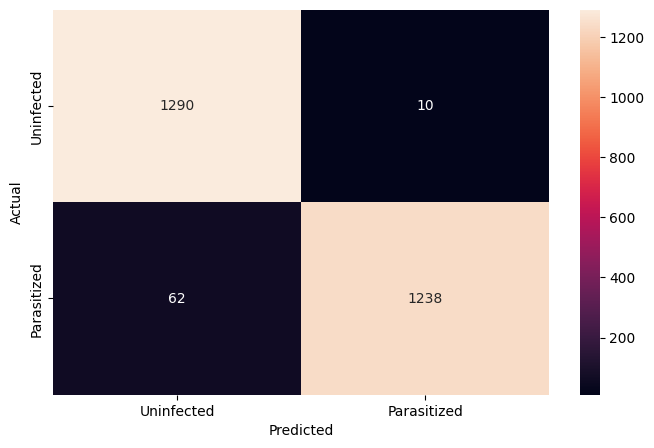

In [53]:
pred_2 = model_2.predict(test_images)
pred_2 = np.argmax(pred_2, axis = 1) 
y_true_2 = np.argmax(test_labels_encoded, axis = 1)
# Printing the classification report
print(classification_report(y_true_2, pred_2))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true_2, pred_2)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

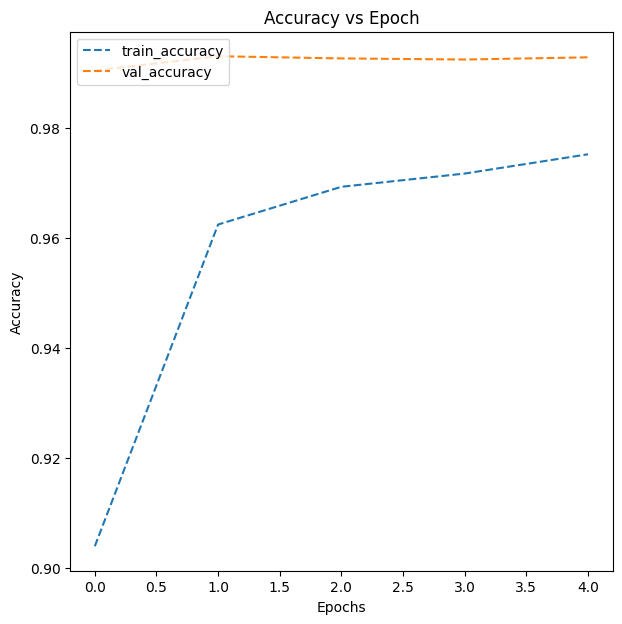

In [54]:
plot_accuracy(history_2)

#### <b>Observations and insights: 

🔍 Observations
 - Accuracy Decline: The new model that incorporates LeakyReLU activation, BatchNormalization, and an adjusted architecture shows a lower accuracy compared to the initial model.
 - Higher False Negatives: There is a noticeable increase in false negatives, indicating that the model is failing to correctly identify some of the parasitized cells.
 - Overfitting Not Evident: The training and validation accuracy curves do not show signs of overfitting, suggesting the model generalizes decently, but its learning capacity might be insufficient or not well-directed.
 - Precision-Recall Imbalance: The recall is lower than before for the parasitized class, even though the precision may remain high. This imbalance leads to missed detections of infected cells, which can be critical in medical diagnosis scenarios.

💡 Insights
 - Model Complexity Isn’t Always Better: Adding more layers or using advanced activations like LeakyReLU and BatchNormalization doesn't guarantee better performance. Simpler models can often outperform complex ones if the architecture isn't well-aligned with the data.
 - Output Layer Design Mismatch (Previously): The earlier mismatch between the output layer shape and the one-hot encoded labels (i.e., Dense(1, activation='sigmoid') vs. 2-class output) may have contributed to initial training issues. While switching to Dense(2, activation='sigmoid') works technically, it's conceptually suboptimal for a binary classification task.

### **Let's explore a few other things :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





### <b>Model 3 with Data Augmentation

In [55]:
backend.clear_session() # Clearing backend for new model

### <b> Using image data generator

In [56]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train, X_val, y_train, y_val = train_test_split(
    train_images, train_labels_encoded, test_size = 0.2, random_state = 42)
# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(
    horizontal_flip = True, zoom_range = 0.5, rotation_range = 30)
val_datagen  = ImageDataGenerator()
# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(
    x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)
# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(
    x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)

* Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.

#### <B>Visualizing Augmented images

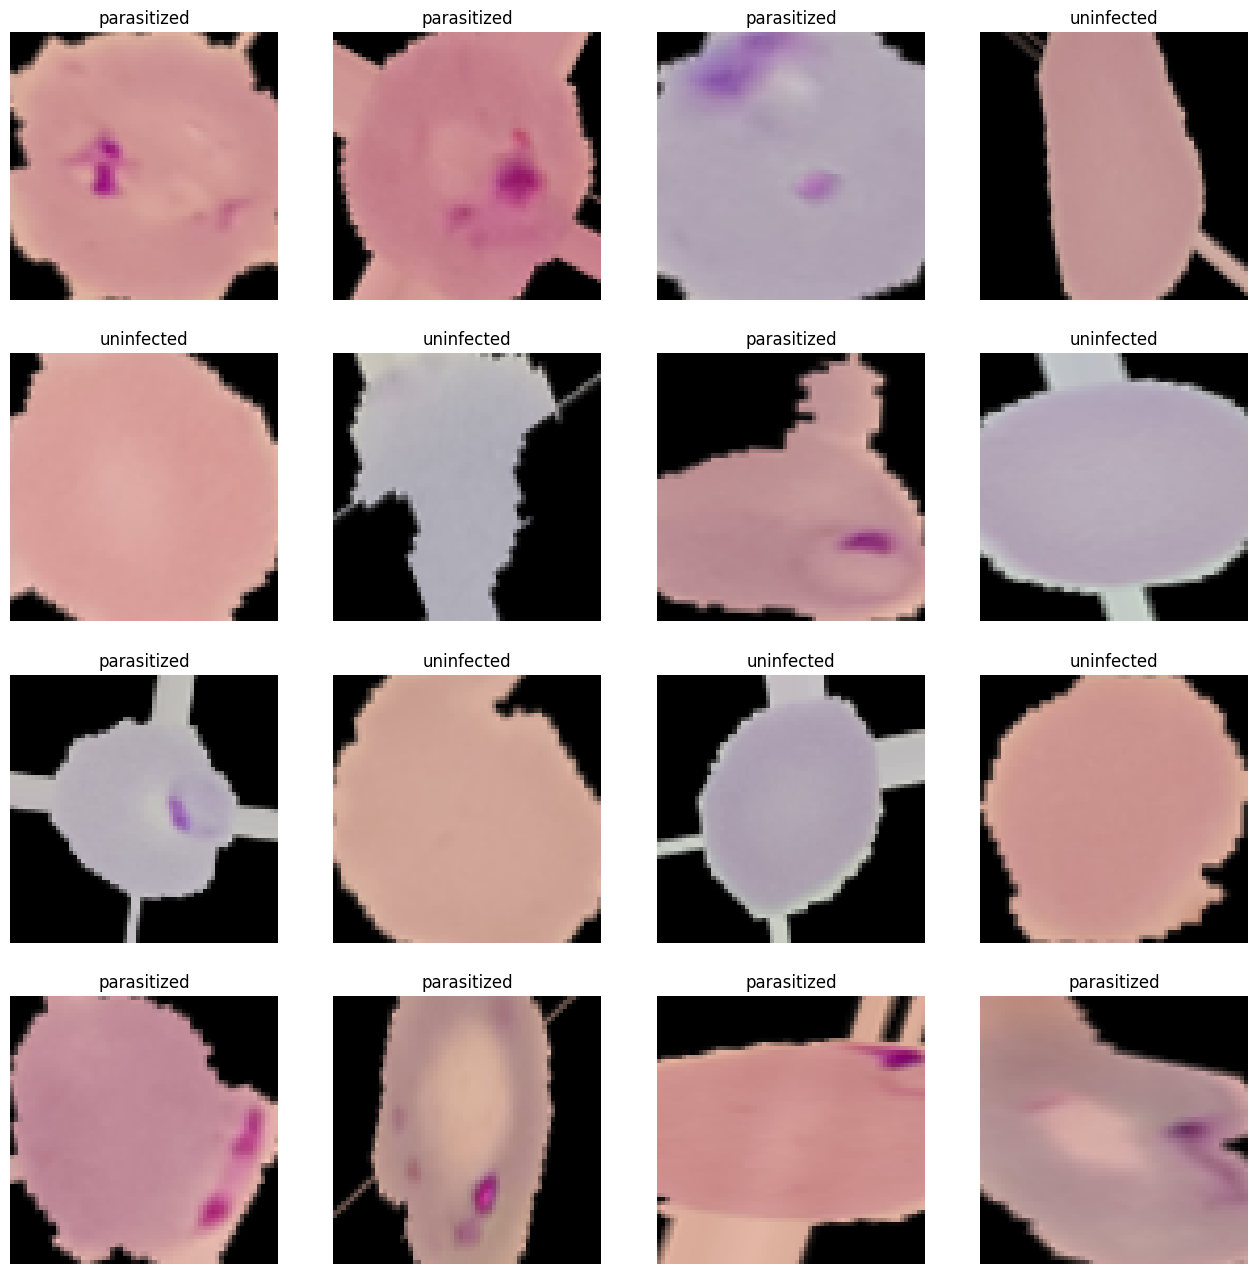

In [57]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)
# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1: 
        ax.set_title('parasitized')
    else:
        ax.set_title('uninfected')
    ax.axis('off')

#### <b>Observations and insights: 
 - Visual Patterns: Upon visual inspection of the augmented images, it is evident that the parasitized images consistently display a distinct dark dot or inclusion—a key visual indicator of infection. This feature persists even after applying augmentation techniques such as rotation, zooming, and horizontal flipping.

 - Uninfected Images: In contrast, the uninfected cell images appear clean and uniform, showing no irregularities or concentrated dark spots even after augmentation. The structural clarity of these cells helps maintain the visual separation between the two classes.

 - Augmentation Robustness: The augmented parasitized images retain their defining features, which suggests that data augmentation does not distort the critical characteristics necessary for accurate classification. This is promising for model generalization.

### <b>Building the Model

In [58]:
model_3 = Sequential()

# First Conv2D Layer
model_3.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (64, 64, 3), padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size = (2, 2)))

# Second Conv2D Layer
model_3.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size = (2, 2)))

# Third Conv2D Layer
model_3.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten and Dense Layers
model_3.add(Flatten())
model_3.add(Dense(128, activation = 'relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(2, activation = 'softmax'))  # Using softmax for multi-class classification

adam = optimizers.Adam(learning_rate = 0.001)
model_3.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,143,106 (4.36 MB)

 Trainable params: 1,142,658 (4.36 MB)

 Non-trainable params: 448 (1.75 KB)

<b>Using Callbacks

In [59]:
callbacks_3 = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.keras', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [60]:
history_3 = model_3.fit(
    train_generator, validation_data = val_generator,
    batch_size = 32, callbacks = callbacks_3, epochs = 20, verbose = 1)

Epoch 1/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 205s 638ms/step - accuracy: 0.7035 - loss: 0.7560 - val_accuracy: 0.4940 - val_loss: 1.4305
Epoch 2/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 214s 685ms/step - accuracy: 0.9252 - loss: 0.2172 - val_accuracy: 0.9377 - val_loss: 0.1694
Epoch 3/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 219s 701ms/step - accuracy: 0.9387 - loss: 0.1972 - val_accuracy: 0.9796 - val_loss: 0.0740
Epoch 4/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 203s 650ms/step - accuracy: 0.9430 - loss: 0.1767 - val_accuracy: 0.9784 - val_loss: 0.0896
Epoch 5/20
312/312 ━━━━━━━━━━━━━━━━━━━━ 250s 801ms/step - accuracy: 0.9482 - loss: 0.1598 - val_accuracy: 0.9800 - val_loss: 0.0802


### <B>Evaluating the model

<b>Plot the train and validation accuracy

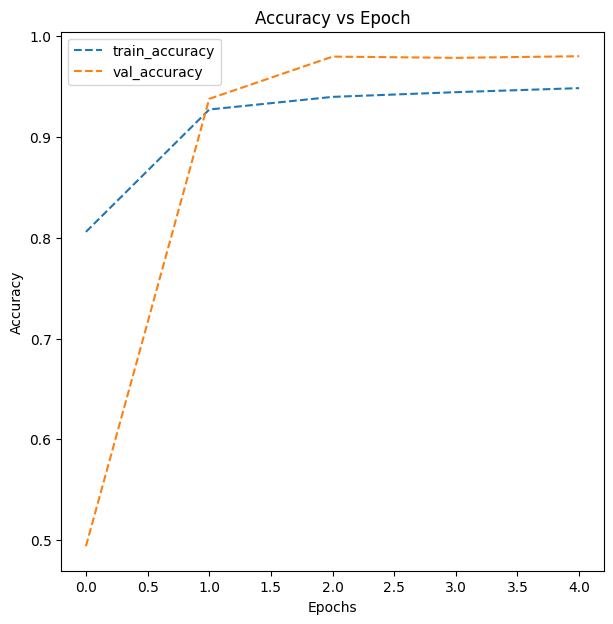

In [61]:
# Potting the accuracies
plot_accuracy(history_3)

In [62]:
# Evaluating the model on test data
accuracy_3 = model_3.evaluate(test_images, test_labels_encoded, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_3[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step - accuracy: 0.9842 - loss: 0.0477

 Test_Accuracy:- 0.9819231033325195


<B>Plotting the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1300
           1       0.98      0.98      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



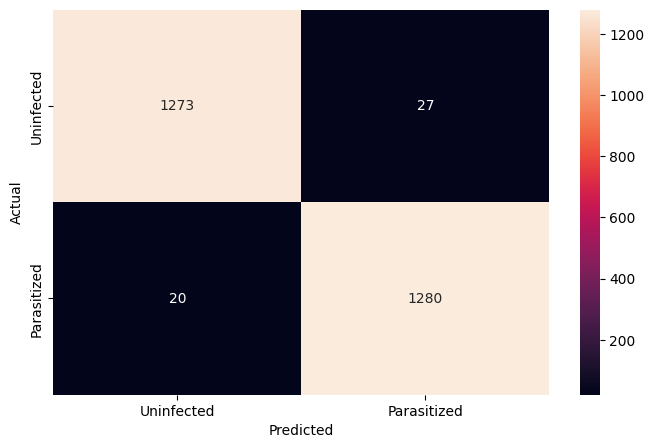

In [63]:
pred_3 = model_3.predict(test_images)
pred_3 = np.argmax(pred_3, axis = 1) 
y_true_3 = np.argmax(test_labels_encoded, axis = 1)
# Printing the classification report
print(classification_report(y_true_3, pred_3))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true_3, pred_3)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**

In [64]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()
# Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [65]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 8, 8, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False
# Add classification layers on top of it  
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model
x = Dense(256, activation = 'relu')(x)
# Similarly add a dense layer with 128 neurons
x = Dropout(0.3)(x)
# Add a dense layer with 64 neurons
x = BatchNormalization()(x)
pred = Dense(2, activation = 'softmax')(x)
model_4 = Model(vgg.input, pred) # Initializing the model

### <b>Compiling the model

In [67]:
optimizer = Adam(learning_rate = 0.0001)
model_4.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

<b> Using callbacks

In [68]:
callbacks_4 = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.keras', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [69]:
# Fitting the model and running the model for 10 epochs
history_4 = model_4.fit(
            train_generator, validation_data = val_generator,
            epochs = 10,
            callbacks = callbacks_4,
            batch_size = 32,
            validation_split = 0.2,
            verbose = 1
)

Epoch 1/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 823s 3s/step - accuracy: 0.7562 - loss: 0.5358 - val_accuracy: 0.9030 - val_loss: 0.3083
Epoch 2/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 824s 3s/step - accuracy: 0.8630 - loss: 0.3542 - val_accuracy: 0.9135 - val_loss: 0.2281
Epoch 3/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 673s 2s/step - accuracy: 0.8696 - loss: 0.3288 - val_accuracy: 0.9223 - val_loss: 0.2106
Epoch 4/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 3523s 11s/step - accuracy: 0.8734 - loss: 0.3097 - val_accuracy: 0.9271 - val_loss: 0.1951
Epoch 5/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 851s 3s/step - accuracy: 0.8782 - loss: 0.2966 - val_accuracy: 0.9301 - val_loss: 0.1912
Epoch 6/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 894s 3s/step - accuracy: 0.8856 - loss: 0.2881 - val_accuracy: 0.9359 - val_loss: 0.1850
Epoch 7/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 850s 3s/step - accuracy: 0.8857 - loss: 0.2831 - val_accuracy: 0.9367 - val_loss: 0.1800
Epoch 8/10
312/312 ━━━━━━━━━━━━━━━━━━━━ 899s 3s/step - accuracy: 0.8872 - loss: 0.2815 - val_ac

<b>Plot the train and validation accuracy

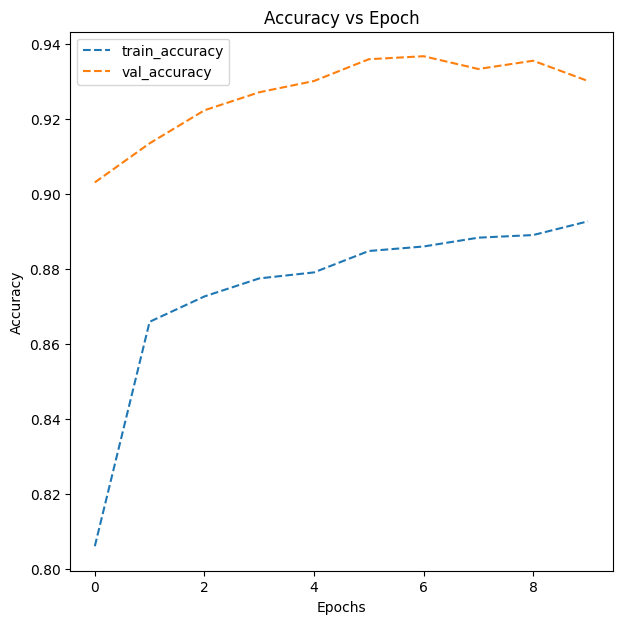

In [70]:
# plotting the accuracies
plot_accuracy(history_4)

### **Observations and insights:**

 - Lower Accuracy with VGG16: Despite being a powerful pre-trained architecture, the VGG16-based model yielded lower training and validation accuracy compared to the initial custom CNN. This suggests that the features learned by VGG16 on ImageNet may not have transferred well to our domain-specific classification task (parasitized vs. uninfected cells).

 - Possible Underfitting: The frozen base layers of VGG16 may have restricted the model’s ability to learn finer features specific to the malaria dataset. This is often a limitation when the source and target domains differ significantly.

 - Custom CNN Model Fit Better: The custom CNN showed better performance, likely because it was tailored and trained from scratch on features relevant to this dataset. It had the flexibility to learn subtle image characteristics like the presence of the parasite dot, which pre-trained models may overlook.

 - Transfer Learning Limitations in Specialized Tasks: Pre-trained models like VGG16 excel in general image recognition but may not perform optimally in highly specific medical or biological imaging tasks, especially when such models are not fine-tuned.

 - Next Steps for Improvement: Fine-tune VGG16 by unfreezing deeper layers to adapt better to this dataset. Explore other pre-trained models like EfficientNetB0 or ResNet50, which may generalize better. Consider domain-specific data augmentation to emphasize features like parasitic spots.

### <b> Evaluating the model

In [71]:
# Evaluating the model on test data
accuracy_4 = model_4.evaluate(test_images, test_labels_encoded, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy_4[1])

82/82 ━━━━━━━━━━━━━━━━━━━━ 68s 810ms/step - accuracy: 0.9229 - loss: 0.1792

 Test_Accuracy:- 0.938076913356781


<b>Plotting the classification report and confusion matrix

82/82 ━━━━━━━━━━━━━━━━━━━━ 66s 802ms/step
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1300
           1       0.95      0.92      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



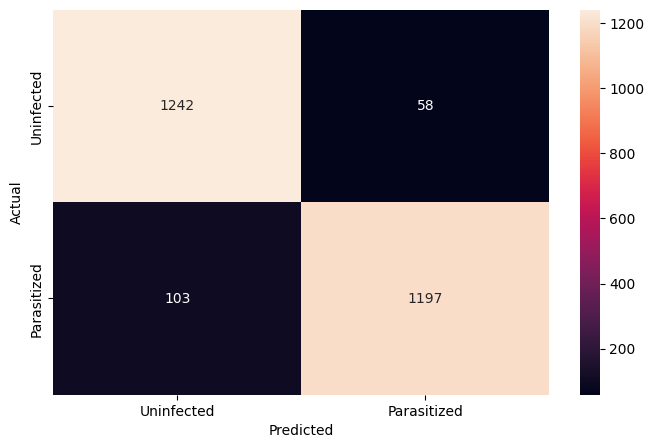

In [72]:
pred_4 = model_4.predict(test_images)
pred_4 = np.argmax(pred_4, axis = 1) 
y_true_4 = np.argmax(test_labels_encoded, axis = 1)
# Printing the classification report
print(classification_report(y_true_4, pred_4))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true_4, pred_4)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### <b>Think about it:</b>
 - VGG16 Performance Below Expectations: The VGG16 model, despite being a well-established pre-trained architecture, showed higher false positives and false negatives based on the confusion matrix and classification report. This indicates that the model struggled to correctly distinguish between parasitized and uninfected cells.

 - VGG16 Transfer Learning Limitation: The poorer performance of the VGG16 model suggests that its ImageNet pre-trained filters did not generalize well to the domain-specific features of the malaria cell dataset. This mismatch likely limited its effectiveness in capturing subtle medical patterns.

#### <b> Observations and Conclusions drawn from the final model:
 - Highest Accuracy with Custom CNN Model: Among all models tested, the first custom CNN architecture yielded the best performance, with the highest accuracy, precision, and recall, and significantly lower misclassifications.

 - Strengths of the Custom CNN Model: The custom CNN model was built from scratch, allowing it to learn domain-specific features such as the presence of parasitic dots. Key components that contributed to its performance include:
  1. Three convolutional blocks with Conv2D, MaxPooling, and Dropout, enabling the network to extract detailed hierarchical features while reducing overfitting.
  2. A fully connected Dense layer with 512 neurons that helped capture complex patterns before classification.
  3. The final softmax layer with 2 output neurons, ideal for the binary classification setup with one-hot encoded labels.

#### **Insights**

#### **Refined insights**:
- Distinct Visual Marker in Parasitized Cells: A key insight from the data is that parasitized cells exhibit a distinct dot-like artifact, likely the presence of the Plasmodium parasite. This feature proved to be a strong visual signal that the model could learn and use for classification, especially in RGB images.

- Custom CNN Outperforms Pretrained and HSV-Based Models: Despite experimenting with transfer learning (e.g., VGG16) and HSV color space, the custom-built CNN trained on raw RGB images consistently achieved the highest accuracy and lowest misclassification rates. This suggests that domain-specific, task-focused architectures can outperform generalized models when working with specialized image datasets like blood smears.

- HSV Color Space Offers No Added Benefit: Converting the input images to HSV color space did not enhance model performance. This implies that the hue and saturation components do not add meaningful discriminative power in this context, and RGB captures the most relevant information for the problem at hand.

- High False Negatives in VGG16 Model Pose a Clinical Risk: Models like VGG16 exhibited high false negatives, meaning infected cells were misclassified as uninfected. This is a critical issue in the context of malaria detection, where missing an infection can have severe consequences. Therefore, model sensitivity (recall for parasitized class) is more important than overall accuracy alone.

- Augmentation Adds Variability, But Not Accuracy Gains: Data augmentation (rotation, shift, zoom, etc.) helped increase dataset variability, which is important for generalization. However, it did not lead to measurable gains in accuracy, suggesting that the model already had access to sufficient variation in the original dataset, or that augmentation artifacts may not align with real-world variations in parasite appearance.

#### **Comparison of various techniques and their relative performance**:
 - Best Performance from Custom CNN Model: Among all approaches tested, the initial custom-built CNN model consistently outperformed other models. It achieved the highest accuracy with significantly lower false positives and false negatives. Its architecture, which included multiple convolutional layers, dropout for regularization, and a dense classification head, was well-suited for learning domain-specific features in the malaria dataset.

 - VGG16 Transfer Learning Underperformed: The VGG16-based model, although powerful in general-purpose image recognition, did not generalize well to microscopic cell images in this medical dataset. The classification report and confusion matrix showed higher misclassification rates, likely due to a mismatch between VGG16’s pre-trained filters (on ImageNet) and the fine-grained patterns in blood smear images.

 - HSV Image Preprocessing Didn’t Improve Results: An alternative preprocessing approach using HSV (Hue, Saturation, Value) image representation was also explored. However, this transformation did not lead to any significant improvement in model accuracy, suggesting that the key discriminative features (such as the parasitic dot) are better captured in the RGB color space.

 - Data Augmentation Added Variability but Not Performance Gains: Data augmentation techniques were employed to increase dataset diversity. While this enhanced model robustness to some degree, the CNN and VGG16 models trained on augmented images still did not outperform the original CNN trained on unaugmented RGB images.

 - Opportunity for Further Optimization: Although the custom CNN model showed the best results so far, further improvements may be possible by:
 1) Exploring other pre-trained architectures such as ResNet, EfficientNet, or DenseNet, which might generalize better to medical imaging tasks.
 2) Experimenting with deeper custom CNN architectures, fine-tuning regularization, learning rates, or layer configurations
 3) Leveraging techniques like ensemble learning or attention mechanisms to better capture critical visual features.

#### **Proposal for the final solution design**:
- Best Performance from Custom CNN Model: Among all approaches tested, the initial custom-built CNN model consistently outperformed other models. It achieved the highest accuracy with significantly lower false positives and false negatives. Its architecture, which included multiple convolutional layers, dropout for regularization, and a dense classification head, was well-suited for learning domain-specific features in the malaria dataset.

In [74]:
sys.exit()

SystemExit: 